In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3

In [ ]:
df_sleuth=pd.read_csv('common_data/Sleuth_results_all.txt')
df_abundance=pd.read_pickle('common_data/Kallisto_abundance.pkl')
df_abundance=df_abundance.drop(columns='length')

In [ ]:
motifs=['THAP11','NRF1','E2F3','SP1','KLF14','SP5','MAZ','ELK4','SP2','KLF9', 'ELK1', 'ELF1','KLF1','KLF6','KLF5','TAL1','NANOG','NF1','LHX3','ASCL2','PRDM10','NFKB1', 'NFKB2','NF1']

In [ ]:
for i,y in enumerate(motifs): 
    transcript=df_sleuth[df_sleuth.ext_gene.isin([y])].target_id
    expression=df_abundance.loc[transcript].sum()
    if i==0: 
        exp=expression
    else:
        exp=np.vstack((exp,expression))
df=pd.DataFrame(exp,index=motifs,columns=expression.index)

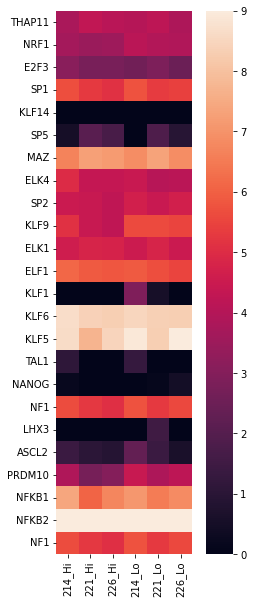

In [ ]:
plt.figure(figsize=(5,10))
sns.heatmap(np.log2(df[['pt214_hi_tpm','pt221_hi_tpm','pt226_hi_tpm','pt214_lo_tpm','pt221_lo_tpm','pt226_lo_tpm']]+0.01),
            robust=1,vmin=0,vmax=9,square=1)
plt.xticks(np.arange(df.shape[1])+0.5,['214_Hi','221_Hi','226_Hi','214_Lo','221_Lo','226_Lo'])
plt.show()
plt.close()

In [ ]:
np.log2(df[['pt214_hi_tpm','pt221_hi_tpm','pt226_hi_tpm','pt214_lo_tpm','pt221_lo_tpm','pt226_lo_tpm']]+0.01),
           

(        pt214_hi_tpm  pt221_hi_tpm  pt226_hi_tpm  pt214_lo_tpm  pt221_lo_tpm  \
 THAP11      3.766171      4.258760      4.097864      4.042802      4.207299   
 NRF1        3.690137      3.477558      3.548190      4.121732      3.963625   
 E2F3        3.119592      2.759320      2.773992      2.619394      2.855105   
 SP1         5.681255      5.303483      5.100319      5.749910      5.324131   
 KLF14      -4.946563     -5.090034     -4.742385     -6.643856     -6.643856   
 SP5         0.499250      2.102023      1.693164     -0.757113      1.844775   
 MAZ         6.663638      7.249538      7.147101      6.855596      7.333348   
 ELK4        4.966375      4.349866      4.325736      4.433476      4.052676   
 SP2         4.465420      4.429647      4.247577      4.666771      4.432955   
 KLF9        5.118696      4.416664      4.238183      5.596837      5.623928   
 ELK1        4.591067      4.799719      4.754453      4.528420      4.791472   
 ELF1        6.123116      5